In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound

In [2]:
#Functions
P = 100                                          #no of points to plot for omega
W = np.linspace(-np.pi,np.pi,P,endpoint=False)   #range of omega

def DTFT(W,sig,n):
    z = np.linspace(0,0,P,dtype=complex)
    for m in range(len(W)):                    #for all the omegas in given range
        dtft = 0
        for i in range (len(sig)):             #for all the points of signal
            dtft = dtft + (sig[i]*(np.cos(W[m]*n[i])-(np.sin(W[m]*n[i]))*1j))      #analysis equation
        z[m] = dtft
    return z                #returns an array which contains dtft of a specific W as element

def Convolution(x,h):
    k = len(x)                                         #variable k stores length of input signal
    l = len(h)                                         #variable l stores length of impulse response signal
    p = k+l-1                                          #length of output signal of convolution is k+l-1
    Y = np.zeros(p)                                  
    for i in range(0,p):                               #Filling in all the array values of output signal
        for j in range(0,k):                           #iteration over length of impulse response signal
            if i-j < l and i-j >= 0  :                 #impulse response is defined only for index greater than or equal to 0 and less than signal length
                Y[i]=Y[i]+x[j]*h[i-j]                  #Convolution sum
    return Y                                           #returns output signal i.e convolution of x and h 

def plotspectrum(sig,W):                               
    mag = []                                                 #variable mag stores magnitude of each element of signal
    phase = []                                               #variable phase stores phase of each element of signal
    for i in range(len(sig)):                                #iteration over all the elements of given signal
        mag.append(abs(sig[i]))                              #calculating magnitude of each element in signal
        phase.append(np.angle(sig[i]))                       #calculating phase of each element in signal
 
    plt.title("Magnitude Plot")                              #Plots Magnitude of vairable sig
    plt.xlabel("ω")  
    plt.ylabel("Magnitude")  
    plt.plot(W,mag)
    plt.show()
    plt.title("Phase Plot")                                  #Plots Phase of vairable sig
    plt.xlabel("ω")  
    plt.ylabel("Phase") 
    plt.plot(W,phase)
    plt.show()
    
def playout(s,fs,name):
    w = wave.open(name+'.wav', 'wb')
    w.setnchannels(1)
    w.setsampwidth(1)
    w.setframerate(fs)
    w.writeframesraw(s.astype('int8'))
    w.close()
    playsound(name+'.wav')

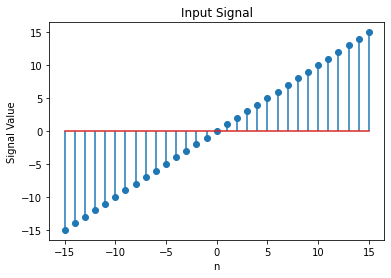

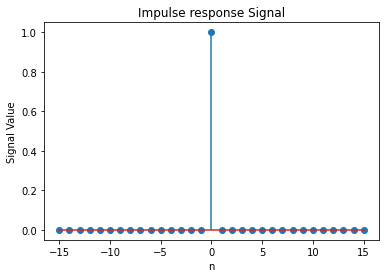


Magnitude and Phase plots of X(e^{jW})*H(e^{jW})


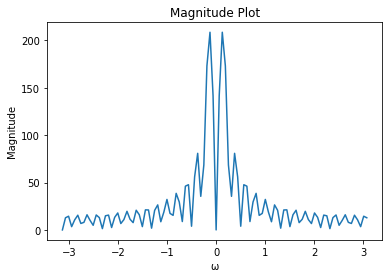

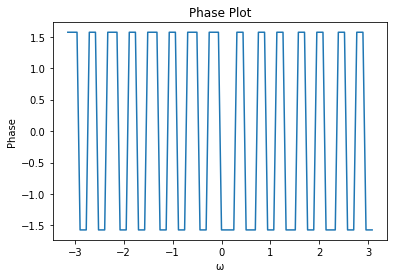

Magnitude and Phase plots of y(e^{jW})


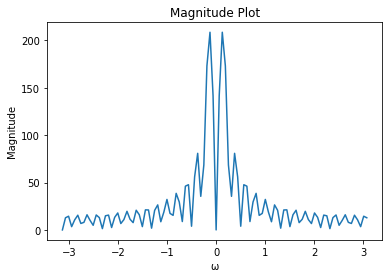

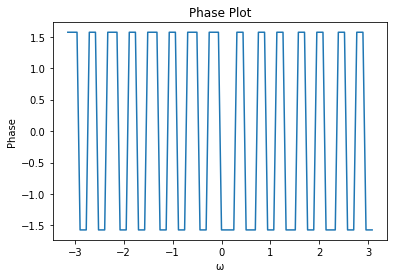

We can observe from the above plots that, both magnitude and phase plots of Y(e^{jW}) and X(e^{jW})H(e^{jW}) are equal,
where Y(e^{jW}) is DTFT(x[n]*h[n]) and X(e^{jW}),H(e^{jW}) are DTFTs of x[n],h[n] respectively.
Hence we can see from the above example that if y[n] = x[n]∗h[n], then Y(e^{jW}) = X(e^{jW})H(e^{jW}).


In [3]:
#k = int(input("Enter number of points in the signal : "))
k = 31
#m = int(input("Enter the first index of the signal : "))                   #we consider that input signal is defined from index m, and is of length k  
m = -15

#l = int(input("Enter number of points in the impulse response signal : "))    
l = 31
#s = int(input("Enter the first index of the impulse response signal : "))  #we consider that impulse response signal is defined from index s, and is of length l   
s = -15

p = k+l-1
n = np.linspace(m,m+k-1,k)                  #array to store indices where input signal is present
t = np.linspace(s,s+l-1,l)                  #array to store indices where impulse response signal is present
r = np.linspace(m+s,m+s+p-1,p)              #array to store indices where convolution output signal is present

        
insignal = np.zeros(k)                      #defining the input signal here x[n]=n
for i in range(len(n)):
    insignal[i] = n[i]

delta = np.zeros(l)
for i in range(len(t)):                    #defining impulse response signal here h[n] is delta signal itself
    if n[i]!=0:     
        delta[i] = 0  
    else:
        delta[i] = 1


convtime = Convolution(insignal,delta)                    #convtime variable stores the convolution output signal y[n]
convfreq = (DTFT(W,insignal,n))*(DTFT(W,delta,t))         #convfreq variable stores the product of DTFTs of x[n] and h[n] i.e X(e^{jW})*H(e^{jW})
convoutfreq = DTFT(W,convtime,r)                          #convoutfreq variable stores the DTFT of convtime (i.e DTFT(y[n]) = Y(e^{jW})) 

plt.title("Input Signal")                              #Plots input signal
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(n,insignal)
plt.show()

plt.title("Impulse response Signal")                              #Plots impulse response signal
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(n,delta)
plt.show()

if convoutfreq.all()==convfreq.all():                     #If condition acts as a check for equality of Y(e^{jW}) and X(e^{jW})*H(e^{jW})
    
    print("\nMagnitude and Phase plots of X(e^{jW})*H(e^{jW})")
    plotspectrum(convfreq,W)
    print("Magnitude and Phase plots of y(e^{jW})")
    plotspectrum(convoutfreq,W)
    print("We can observe from the above plots that, both magnitude and phase plots of Y(e^{jW}) and X(e^{jW})H(e^{jW}) are equal,")
    print("where Y(e^{jW}) is DTFT(x[n]*h[n]) and X(e^{jW}),H(e^{jW}) are DTFTs of x[n],h[n] respectively.")
    print("Hence we can see from the above example that if y[n] = x[n]∗h[n], then Y(e^{jW}) = X(e^{jW})H(e^{jW}).")


Case-1 :


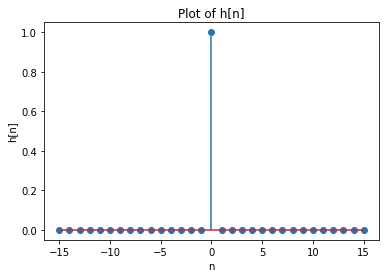

Plots of magnitude and phase components of H(e^{jW})


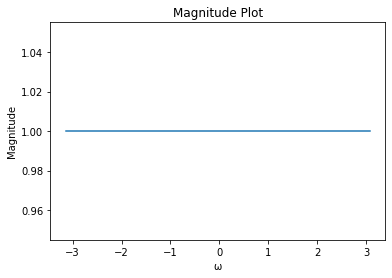

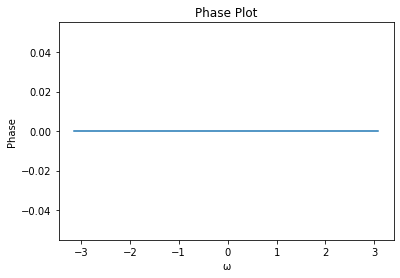

Observation : We can observe impulse signal has constant magnitude of 1 and zero phase for all values of omega in frequency domain. This system passes the signal without any changes.

Case-2 :


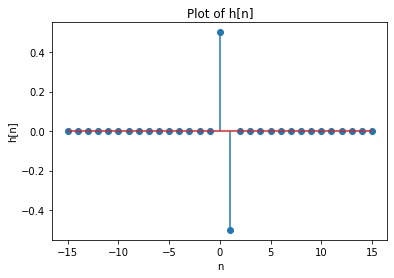

Plots of magnitude and phase components of H(e^{jW})


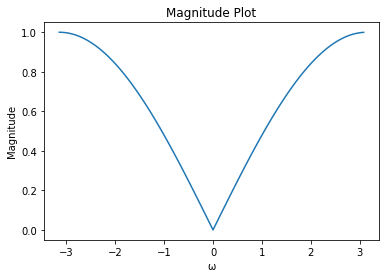

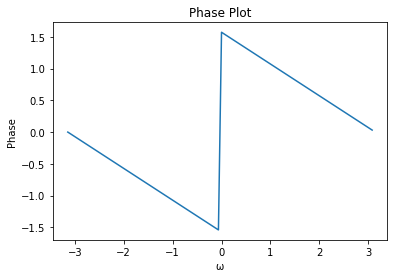

Observation : DTFT of the given signal in Case(b) has magnitude = absolute(sin(ω/2)) and phase = -(ω/2) + (pi/2) i.e, it is linear phase system. Also We can observe from the magnitude plot that the given system acts as a high pass filter.

Case-3 :


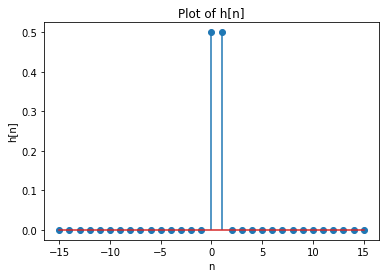

Plots of magnitude and phase components of H(e^{jW})


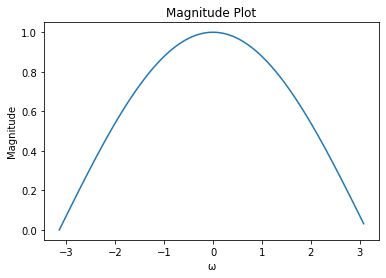

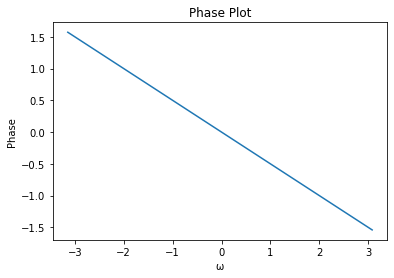

Observation : DTFT of the given signal in Case(c) has magnitude = absolute(cos(ω/2)) and phase = -(ω/2) i.e, it is linear phase system. Also We can observe from the magnitude plot that the given system acts as a low pass filter.

Case-4 :


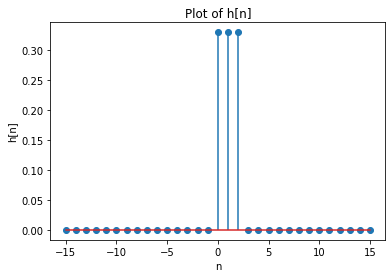

Plots of magnitude and phase components of H(e^{jW})


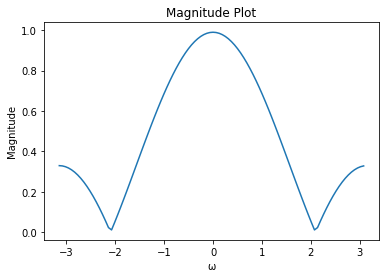

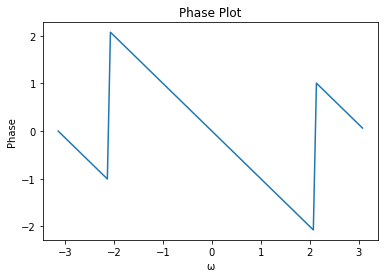

Observation : We can observe that the DTFT of the given signal in Case(d) is summation of constant 0.33 and 2 sinusoidal waves with angular frequency ω and 2ω having same amplitude. The given system passes low frequency signals with a very little distortion and attenuates slightly higher frequencies(i.e angular frequencies of range 1 to pi), also it completely rejects the signals around angular frequency=2 (Bandstop filter). From the phase plot we can observe it is a linear phase system.

Case-5 :


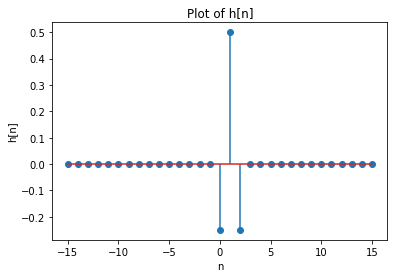

Plots of magnitude and phase components of H(e^{jW})


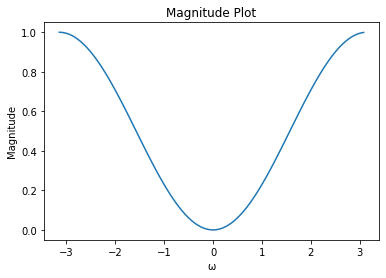

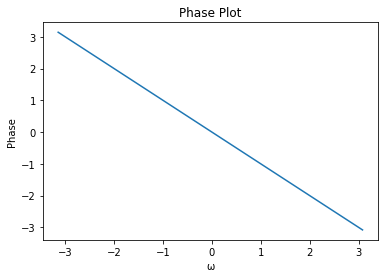

Observation : We can observe that the DTFT of the given signal in Case(e) is algebraic sum of constant -0.25 and 2 sinusoidal waves with angular frequency ω and 2ω having different amplitudes. The magnitude plot of signal's DTFT resembles high pass filter. From the phase plot we can observe phase=-ω, it is a linear phase system.

Case-6 :


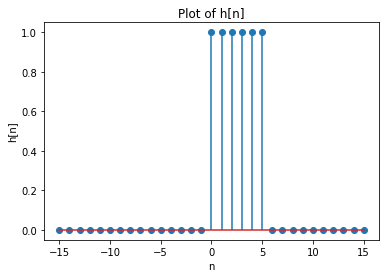

Plots of magnitude and phase components of H(e^{jW})


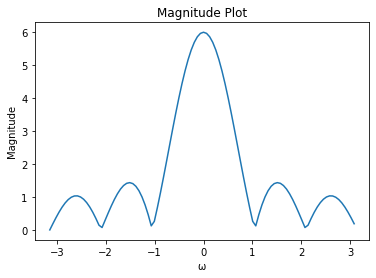

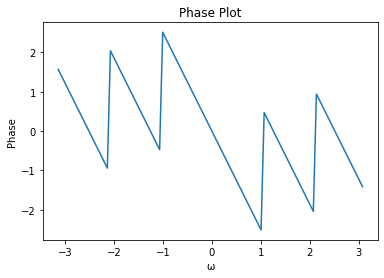

Observation : From the plot of h[n], we can observe the given signal in Case(f) is rectangle signal. Hence the DTFT of the signal is given by mod(sinc(ω)). From the phase plot we can observe it is a linear phase system. The given system passes signals with anugular frequencies between -1 and 1 with amplification and attenuates the rest .

Case-7 :


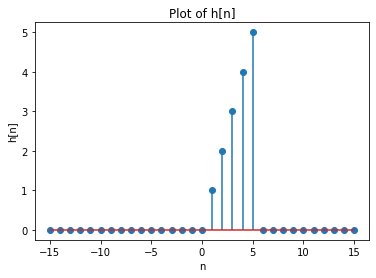

Plots of magnitude and phase components of H(e^{jW})


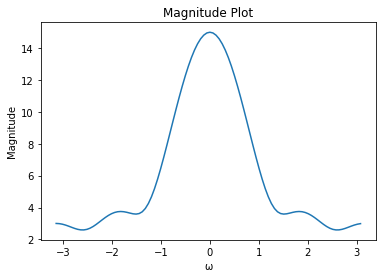

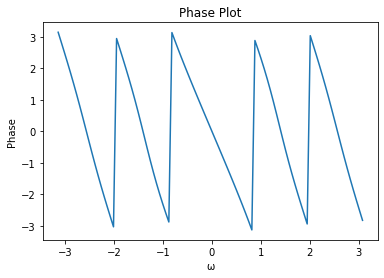

Observation : From the magnitude plot of the DTFT of signal given in Case(g), we can observe that this system amplifies the signals, as it has magnitude> 2 for angular frequencies in range -pi to pi. Whereas from the phase plot we can observe that it is a linear phase system.

Case-8 :


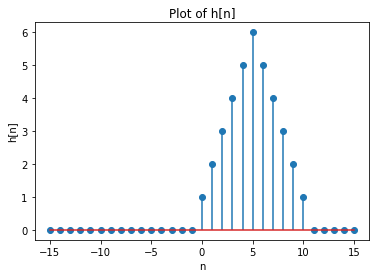

Plots of magnitude and phase components of H(e^{jW})


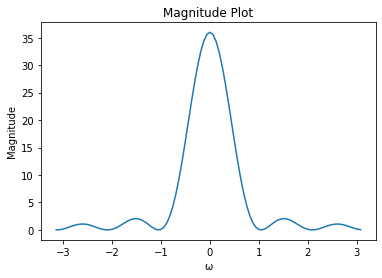

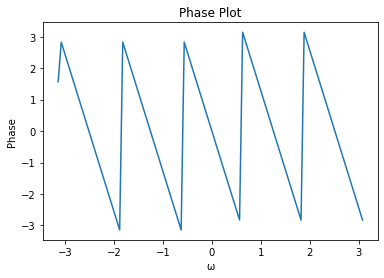

Observation : From the magnitude plot of the DTFT of signal given in Case(h), we can observe that this system amplifies the signals(higher amplification than in Case(g) for ω between -1 and 1), as it has magnitude> 2, whereas for ω near 1,2 and pi the magnitude becomes almost zero. Hence this system can be used as lowpass amplification . Whereas from the phase plot we can observe that it is a linear phase system.

Case-9 :


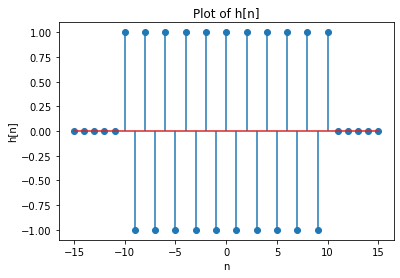

Plots of magnitude and phase components of H(e^{jW})


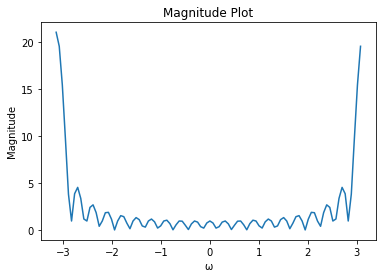

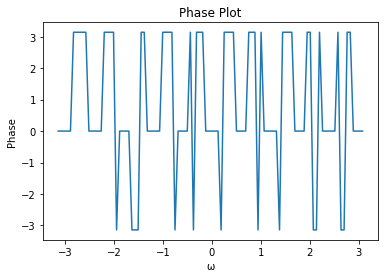

Observation : The given signal in Case(i) is cos function, hence from the magnitued plot of DTFT we can observe it represents shifted delta signals , i.e delta at ω=-pi and ω=pi and slight noises(sinusoidal signals) between (negligible).

Case-10 :


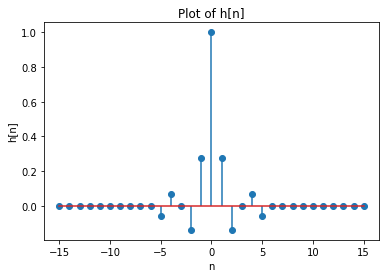

Plots of magnitude and phase components of H(e^{jW})


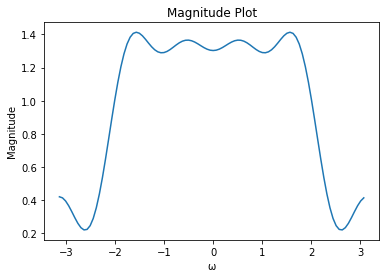

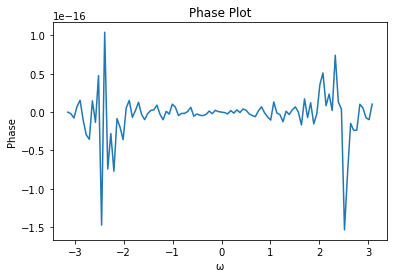

Observation : We can observe that the given signal is h[n]=(ω0/pi)*sinc(ω0*n). Hence from the magnitude of DTFT plot we can observe it acts as rectangular signal with slight distortions i.e this system acts as a bandpass filter, whereas the phase is almost zero for all values of ω.


In [4]:

#Defining delta as a function
def Delta(n):
    if n!=0:     
        return 0  
    else:
        return 1

def Allsignals(l,t,num):                                     #Function to return the signals mentioned from (a) to (j) 
    
    if num==1:                                               #Case(a) h[n] = δ[n]
        sig1 = np.zeros(l)
        for i in range(len(t)):
             sig1[i] = Delta(t[i])
        return sig1
    
    elif num==2:                                             #Case(b) h[n] = 0.5δ[n] − 0.5δ[n−1]
        sig2 = np.zeros(l)
        for i in range(len(t)):
            if t[i]!=0:
                sig2[i] = 0.5*Delta(t[i]) - 0.5*Delta(t[i-1])
            else:
                sig2[i] = 0.5*Delta(t[i])
        return sig2
    
    elif num==3:                                             #Case(c) h[n] = 0.5δ[n] + 0.5δ[n − 1]
        sig3 = np.zeros(l)
        for i in range(len(t)):
            if t[i]!=0:
                sig3[i] = 0.5*Delta(t[i]) + 0.5*Delta(t[i-1])
            else:
                sig3[i] = 0.5*Delta(t[i])
        return sig3
    
    elif num==4:                                             #Case(d) h[n] = 0.33δ[n] + 0.33δ[n − 1] + 0.33δ[n − 2]
        sig4 = np.zeros(l)
        for i in range(len(t)):
            if t[i]==0:
                sig4[i] = 0.33*Delta(t[i]) 
            elif t[i]==1:
                sig4[i] = 0.33*Delta(t[i]) + 0.33*Delta(t[i-1])
            else:
                sig4[i] = 0.33*Delta(t[i]) + 0.33*Delta(t[i-1]) + 0.33*Delta(t[i-2])
        return sig4
    
    elif num==5:                                             #Case(e) h[n] = −0.25δ[n] + 0.50δ[n − 1] − 0.25δ[n − 2]
        sig5 = np.zeros(l)
        for i in range(len(t)):
            if t[i]==0:
                sig5[i] = -0.25*Delta(t[i]) 
            elif t[i]==1:
                sig5[i] = -0.25*Delta(t[i]) + 0.5*Delta(t[i-1])
            else:
                sig5[i] = -0.25*Delta(t[i]) + 0.5*Delta(t[i-1]) - 0.25*Delta(t[i-2])
        return sig5
    
    elif num==6:                                             #Case(f) h[n] = 1 for 0<=n<=5 and h[n] = 0 otherwise
        sig6 = np.zeros(l)
        for i in range(len(t)):
            if t[i]>=0 and t[i]<=5:
                sig6[i] = 1
            else:
                sig6[i] = 0
        return sig6
    
    elif num==7:                                             #Case(g) h[n] = n for 0≤n≤5 and h[n] = 0 otherwise
        sig7 = np.zeros(l)
        for i in range(len(t)):
            if t[i]>=0 and t[i]<=5:
                sig7[i] = t[i]
            else:
                sig7[i] = 0
        return sig7
    
    elif num==8:                                             #Case(h) h[n] = n + 1 for 0≤n≤5; h[n] = h[10 − n] for 5 <n≤10; h[n] = 0 for all other n                                         
        sig8 = np.zeros(l)
        for i in range(len(t)):
            if t[i]>=0 and t[i]<=5:
                sig8[i] = t[i]+1
            elif t[i]>5 and t[i]<=10:
                sig8[i] = sig8[(5-s)*2-i]
            else:
                sig8[i] = 0
        return sig8
    
    elif num==9:                                             #Case(i) h[n] = cos(πn); −N ≤ n ≤ N
        N = 10  
        #N = 3                                               #To Test for different N values, Change value of N
        #N = 5
        sig9 = np.zeros(l)
        for i in range(len(t)):
            if t[i]>=-N and t[i]<=N:
                sig9[i] = np.cos(t[i]*np.pi)
            else:
                sig9[i] = 0
        return sig9
    
    else:                                                    #Case(j) h[n] = sin((ω_0)*n)/πn; −M ≤ n ≤ M and h[0] = 1.
        M = 6
        #M = 3                                               #To Test for different M values, Change value of M
        #M = 6
        w_0 = (2*np.pi)/3
        #w_0 = (2*np.pi)/4                                   #To Test for different w_0 values, Change value of w_0
        #w_0 = (2*np.pi)/10
        sig10 = np.zeros(l)
        for i in range(len(t)):
            if t[i]==0:
                sig10[i] = 1
            elif t[i]>=-M and t[i]<=M:
                sig10[i] = (float)(np.sin(t[i]*w_0))/(t[i]*np.pi)
            else:
                sig10[i] = 0
        return sig10


for i in range(1,11):                                      #Plotting Magnitude and phase spectrums for DTFTs of signals (a) to (j)
    print("\n" "\033[1m"+"Case-%d :" %i +"\033[0m")
    plt.title("Plot of h[n]")                              #Plots Magnitude of vairable sig
    plt.xlabel("n")  
    plt.ylabel("h[n]")  
    plt.stem(t,Allsignals(l,t,i))
    plt.show()
    print("Plots of magnitude and phase components of H(e^{jW})")
    plotspectrum(DTFT(W,Allsignals(l,t,i),t),W)
    if i==1:
        print("Observation : We can observe impulse signal has constant magnitude of 1 and zero phase for all values of omega in frequency domain. This system passes the signal without any changes.")
    elif i==2:
        print("Observation : DTFT of the given signal in Case(b) has magnitude = absolute(sin(ω/2)) and phase = -(ω/2) + (pi/2) i.e, it is linear phase system. Also We can observe from the magnitude plot that the given system acts as a high pass filter.")
    elif i==3:
        print("Observation : DTFT of the given signal in Case(c) has magnitude = absolute(cos(ω/2)) and phase = -(ω/2) i.e, it is linear phase system. Also We can observe from the magnitude plot that the given system acts as a low pass filter.")
    elif i==4:
        print("Observation : We can observe that the DTFT of the given signal in Case(d) is summation of constant 0.33 and 2 sinusoidal waves with angular frequency ω and 2ω having same amplitude. The given system passes low frequency signals with a very little distortion and attenuates slightly higher frequencies(i.e angular frequencies of range 1 to pi), also it completely rejects the signals around angular frequency=2 (Bandstop filter). From the phase plot we can observe it is a linear phase system.")
    elif i==5:
        print("Observation : We can observe that the DTFT of the given signal in Case(e) is algebraic sum of constant -0.25 and 2 sinusoidal waves with angular frequency ω and 2ω having different amplitudes. The magnitude plot of signal's DTFT resembles high pass filter. From the phase plot we can observe phase=-ω, it is a linear phase system.")
    elif i==6:
        print("Observation : From the plot of h[n], we can observe the given signal in Case(f) is rectangle signal. Hence the DTFT of the signal is given by mod(sinc(ω)). From the phase plot we can observe it is a linear phase system. The given system passes signals with anugular frequencies between -1 and 1 with amplification and attenuates the rest .")
    elif i==7:
        print("Observation : From the magnitude plot of the DTFT of signal given in Case(g), we can observe that this system amplifies the signals, as it has magnitude> 2 for angular frequencies in range -pi to pi. Whereas from the phase plot we can observe that it is a linear phase system.")
    elif i==8:
        print("Observation : From the magnitude plot of the DTFT of signal given in Case(h), we can observe that this system amplifies the signals(higher amplification than in Case(g) for ω between -1 and 1), as it has magnitude> 2, whereas for ω near 1,2 and pi the magnitude becomes almost zero. Hence this system can be used as lowpass amplification . Whereas from the phase plot we can observe that it is a linear phase system.")
    elif i==9:
        print("Observation : The given signal in Case(i) is cos function, hence from the magnitued plot of DTFT we can observe it represents shifted delta signals , i.e delta at ω=-pi and ω=pi and slight noises(sinusoidal signals) between (negligible).")
    else:
        print("Observation : We can observe that the given signal is h[n]=(ω0/pi)*sinc(ω0*n). Hence from the magnitude of DTFT plot we can observe it acts as rectangular signal with slight distortions i.e this system acts as a bandpass filter, whereas the phase is almost zero for all values of ω.")

Enter the sample (alarm/cry) : alarm

From Q1 we observed that DTFT of convlution output signal is the product of DTFTs of input signal and impulse response.
Which implies magnitude of DTFT of convolution output is the product of magnitudes of input and impulse response DTFTs.
Whereas phase of DTFT of output convolution signal is the sum of phases of input signal and impulse response signal DTFTs.
From Q2 plots we observed both the magnitude and phase plots for DTFT of impulse response signal in all Cases
Below we can observe the Magnitude and Phase plots for DTFT of input audio signal : 


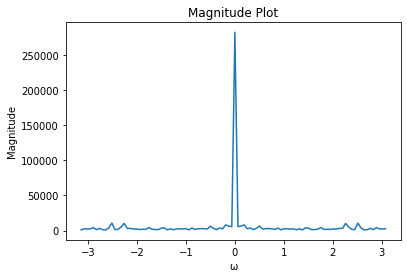

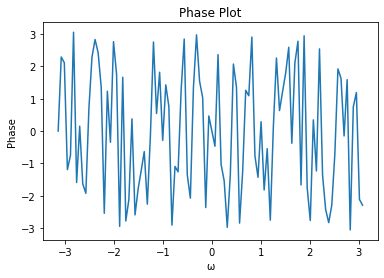

Below we can observe the magnitude and phase plots for DTFT of output signal of convolution in all the Cases:

Case-1 :


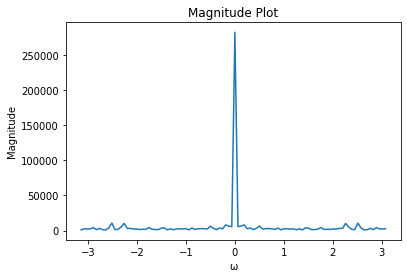

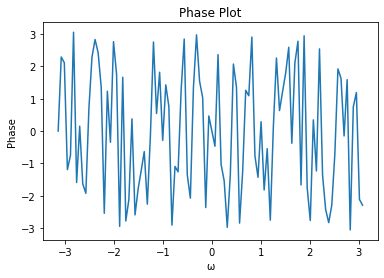

Observation : Since Impulse response signal is impulse, we can observe that both the magnitude spectrum and phase spectrum of output signal is same as input signal.

Case-2 :


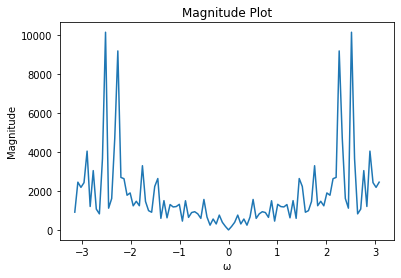

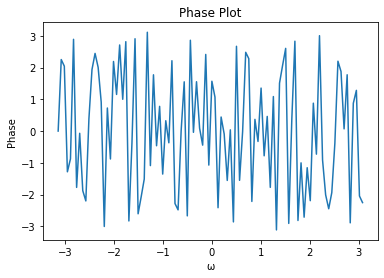

Observation : Since Impulse response signal acts as a high pass filter, we can observe from the magnitude spectrum of output signal that low frequency signals are attenuated and high frequency signals are passed.

Case-3 :


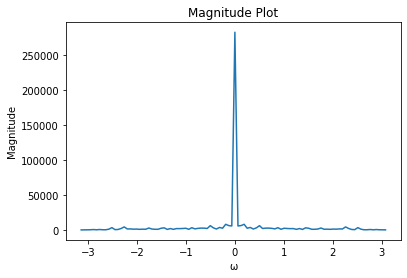

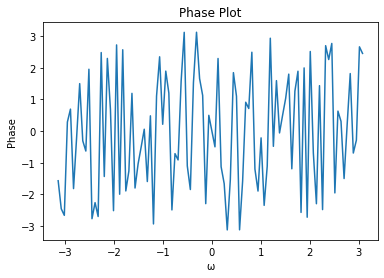

Observation : Since Impulse response signal acts as a low pass filter, we can observe from the magnitude spectrum of output signal that high frequency signals are attenuated and low frequency signals are passed.

Case-4 :


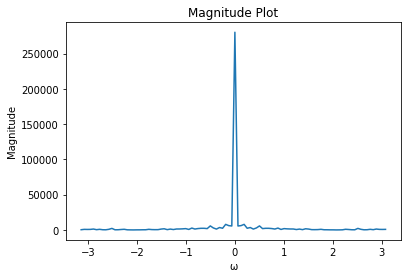

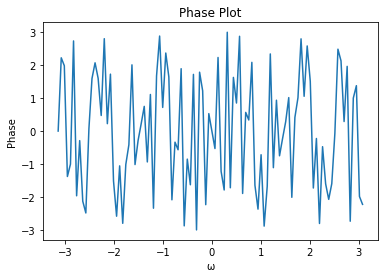

Observation : Since Impulse response signal acts as a bandstop filter at ω=2 and also slightly distortes high frequency signals, we can observe from the magnitude spectrum of output signal that at ω=2 magnitude is zero and high frequency signals are slighlty distorted.

Case-5 :


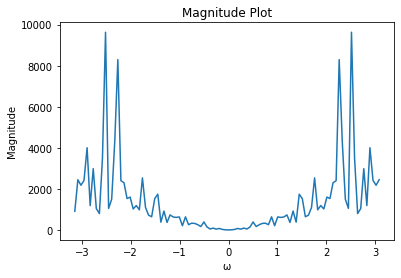

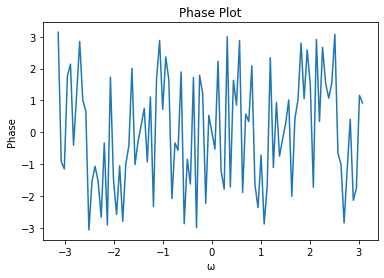

Observation : Since Impulse response signal acts as a high pass filter, we can observe from the magnitude spectrum of output signal that low frequency signals are attenuated and high frequency signals are passed.

Case-6 :


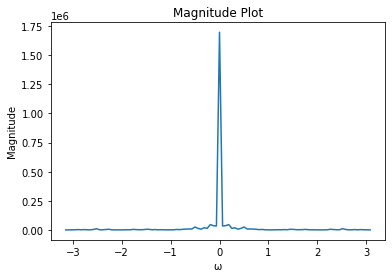

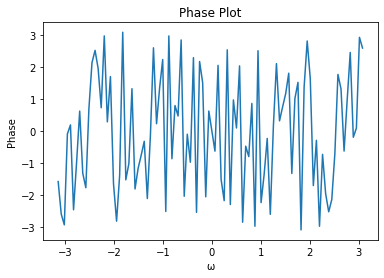

Observation : Since Impulse response signal acts as amplifier for low frequency signals, we can observe from the magnitude spectrum of output signal that signals amplifies a lot (y-axis range : 1e6). For higher frequencies there isnt much amplification.

Case-7 :


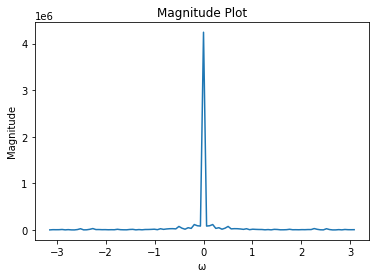

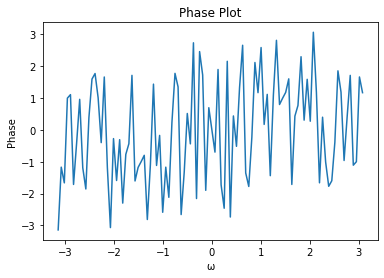

Observation : Since Impulse response signal acts as amplifier for all frequency signals (ω in range -pi to pi), we can observe from the magnitude spectrum of output signal that signals amplifies a lot (y-axis range : 1e6) for all frequencies (the input audio file itself has low magnitude at high angular frequencies).

Case-8 :


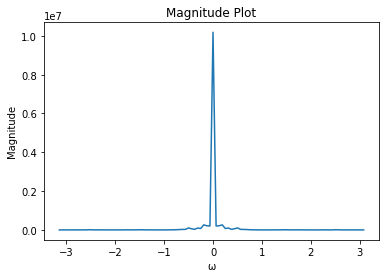

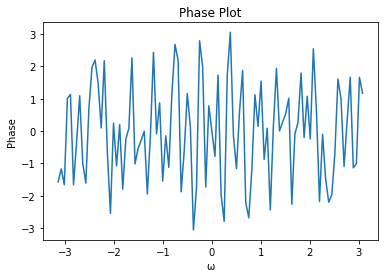

Observation : Since Impulse response signal acts as amplifier (high amplification than case-6 and 7) for angular frequencies in range -1 to 1, we can observe from the magnitude spectrum of output signal that signals amplifies more than case-6 and 7 (y-axis range : 1e7) for angular frequencies in range -1 to 1 and is completely attenuated for ω near 1,2,pi.

Case-9 :


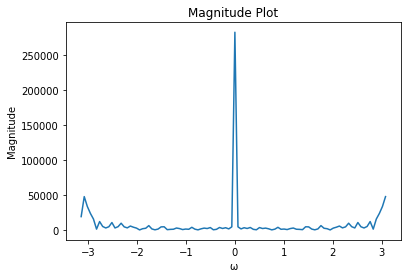

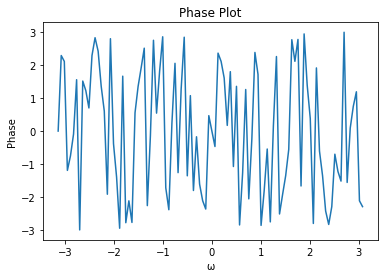

Observation : Since Impulse response signal consists of shifted versions of deltas at -pi and pi, we can observe that from the magnitude spectrum of output signal that it is equal to input signal at ω=-pi and pi.

Case-10 :


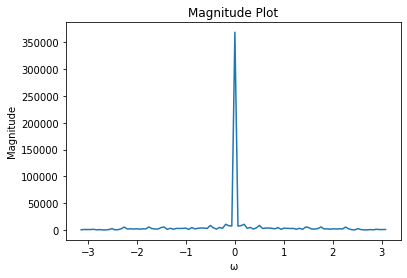

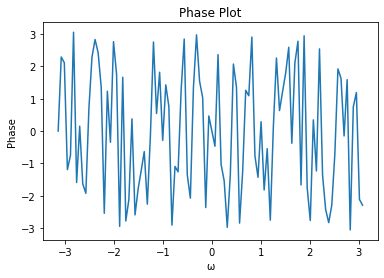

Observation : Since Impulse response signal acts as a rectangular function, we can observe from the magnitude spectrum of output signal that signal is passed only within certain range of ω and is attenuated after it.


In [5]:
samp = input("Enter the sample (alarm/cry) : ")
w = wave.open(samp+'.wav','rb')                                            #accessing the mentioned wav file
lst= w.readframes(w.getnframes())                                       #variable lst stores all the frames (bytes) in wav file 
fs = w.getframerate()                                                   #variable fs stores framerate of wav signal

signal = np.frombuffer(lst,dtype=np.int8)
        

playsound(samp+'.wav')                                                    #playing the original audio file

k = w.getnframes()
m = 0


p = k+l-1

n = np.linspace(m,m+k-1,k)                  #array to store indices where audio signal is present
t = np.linspace(s,s+l-1,l)                  #array to store indices where impulse response signal is present
r=np.linspace(m+s,m+s+p-1,p)                #array to store indices where convolution output signal is present


print("\nFrom Q1 we observed that DTFT of convlution output signal is the product of DTFTs of input signal and impulse response.")
print("Which implies magnitude of DTFT of convolution output is the product of magnitudes of input and impulse response DTFTs.")
print("Whereas phase of DTFT of output convolution signal is the sum of phases of input signal and impulse response signal DTFTs.")
print("From Q2 plots we observed both the magnitude and phase plots for DTFT of impulse response signal in all Cases")
print("Below we can observe the " "\033[1m" + "Magnitude and Phase plots for DTFT of input audio signal : " + "\033[0m")
plotspectrum(DTFT(W,signal,n),W)

print("Below we can observe the magnitude and phase plots for DTFT of output signal of convolution in all the Cases:")
#output signals of convolutions
for i in range(1,11):
    output = Convolution(signal,Allsignals(l,t,i))
    playout(output,fs,samp+str(i))                                      #playing the audio files after convolution for each case
    print("\n" "\033[1m"+"Case-%d :" %i + "\033[0m")      
    plotspectrum(DTFT(W,output,r),W)                          #plotting the magnitude and phase spectrums for DTFTs of audio files after convolution. 
    if i==1:
        print("Observation : Since Impulse response signal is impulse, we can observe that both the magnitude spectrum and phase spectrum of output signal is same as input signal.")
    elif i==2:
        print("Observation : Since Impulse response signal acts as a high pass filter, we can observe from the magnitude spectrum of output signal that low frequency signals are attenuated and high frequency signals are passed.")
    elif i==3:
        print("Observation : Since Impulse response signal acts as a low pass filter, we can observe from the magnitude spectrum of output signal that high frequency signals are attenuated and low frequency signals are passed.")
    elif i==4:
        print("Observation : Since Impulse response signal acts as a bandstop filter at ω=2 and also slightly distortes high frequency signals, we can observe from the magnitude spectrum of output signal that at ω=2 magnitude is zero and high frequency signals are slighlty distorted.")
    elif i==5:
        print("Observation : Since Impulse response signal acts as a high pass filter, we can observe from the magnitude spectrum of output signal that low frequency signals are attenuated and high frequency signals are passed.")
    elif i==6:
        print("Observation : Since Impulse response signal acts as amplifier for low frequency signals, we can observe from the magnitude spectrum of output signal that signals amplifies a lot (y-axis range : 1e6). For higher frequencies there isnt much amplification.")
    elif i==7:
        print("Observation : Since Impulse response signal acts as amplifier for all frequency signals (ω in range -pi to pi), we can observe from the magnitude spectrum of output signal that signals amplifies a lot (y-axis range : 1e6) for all frequencies (the input audio file itself has low magnitude at high angular frequencies).")
    elif i==8:
        print("Observation : Since Impulse response signal acts as amplifier (high amplification than case-6 and 7) for angular frequencies in range -1 to 1, we can observe from the magnitude spectrum of output signal that signals amplifies more than case-6 and 7 (y-axis range : 1e7) for angular frequencies in range -1 to 1 and is completely attenuated for ω near 1,2,pi.")
    elif i==9:
        print("Observation : Since Impulse response signal consists of shifted versions of deltas at -pi and pi, we can observe that from the magnitude spectrum of output signal that it is equal to input signal at ω=-pi and pi.")
    else:
        print("Observation : Since Impulse response signal acts as a rectangular function, we can observe from the magnitude spectrum of output signal that signal is passed only within certain range of ω and is attenuated after it.")